# Ensemble Modeling Heart Disease 분류 모델 비교 (정상 : 0, 심장 질환 진단 : 1) 모델 비교


*   선형모델(LogisticRegression)과 결정트리(DecisionTreeClassifier), 앙상블 모델의 비교
*   앙상블 모델 (RandomForestClassifier, GradientBoostingClassifier)


In [1]:
!pip install koreanize-matplotlib

## 패키지 import

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import koreanize_matplotlib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

## 데이터 준비하기


*   https://archive.ics.uci.edu/dataset/45/heart+disease



In [3]:
df = pd.read_csv('/content/heart.csv')
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

## 데이터 전처리

### 범주형 칼럼 -> Dtype category -> 원한 인코딩

In [6]:
# 카테고리 칼럼 정의 후 Dtype 변경
categorical_var = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp',	'caa',	'thall']
df[categorical_var] = df[categorical_var].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       303 non-null    int64   
 1   sex       303 non-null    category
 2   cp        303 non-null    category
 3   trtbps    303 non-null    int64   
 4   chol      303 non-null    int64   
 5   fbs       303 non-null    category
 6   restecg   303 non-null    category
 7   thalachh  303 non-null    int64   
 8   exng      303 non-null    category
 9   oldpeak   303 non-null    float64 
 10  slp       303 non-null    category
 11  caa       303 non-null    category
 12  thall     303 non-null    category
 13  output    303 non-null    int64   
dtypes: category(8), float64(1), int64(5)
memory usage: 17.9 KB


### 숫자형(연속형) 칼럼 -> 정규화

In [7]:
numberic_var = [i for i in df.columns if i not in categorical_var][:-1]
df[numberic_var]

,age,trtbps,chol,thalachh,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6
...,...,...,...,...,...
298,57,140,241,123,0.2
299,45,110,264,132,1.2
300,68,144,193,141,3.4
301,57,130,131,115,1.2


## 데이터 분석

### output(Target) 칼럼의 비율 확인 (0 : 정상, 1 : 심장질환)

<Axes: ylabel='output'>

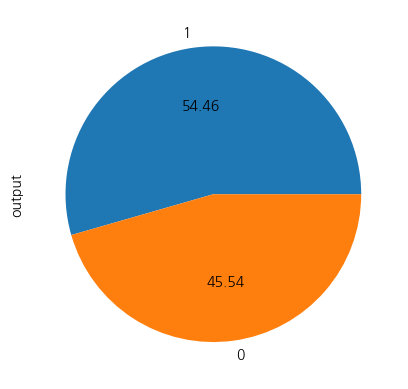

In [8]:
df['output'].value_counts().plot.pie(autopct='%.2f') # 비율이 거의 비슷함

<Axes: >

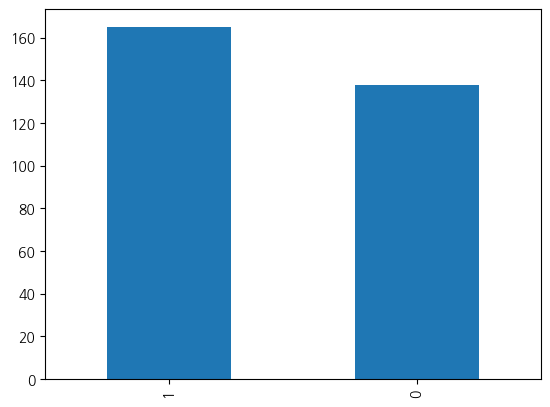

In [9]:
df['output'].value_counts().plot.bar()

### 성별 (sex) 칼럼의 비율 확인 (0 : 여성, 1 : 남성)

<Axes: ylabel='sex'>

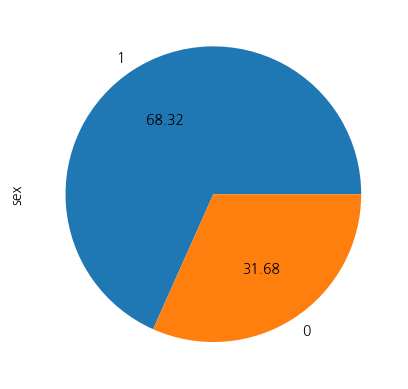

In [10]:
df['sex'].value_counts().plot.pie(autopct='%.2f') # 남성의 dataset 이 많음을 알 수 있음

### cp(가슴 통증)과 output(심장 질환) 관계 확인

In [11]:
df.groupby('cp').sum().reset_index()[['cp', 'output']]

,cp,output
0,0,39
1,1,41
2,2,69
3,3,16


In [12]:
px.bar(df.groupby('cp').sum().reset_index()[['cp', 'output']], x = 'cp', y = 'output', color = 'cp')

### 범주형 변수 (categorical_var)와 output 관계 시각화

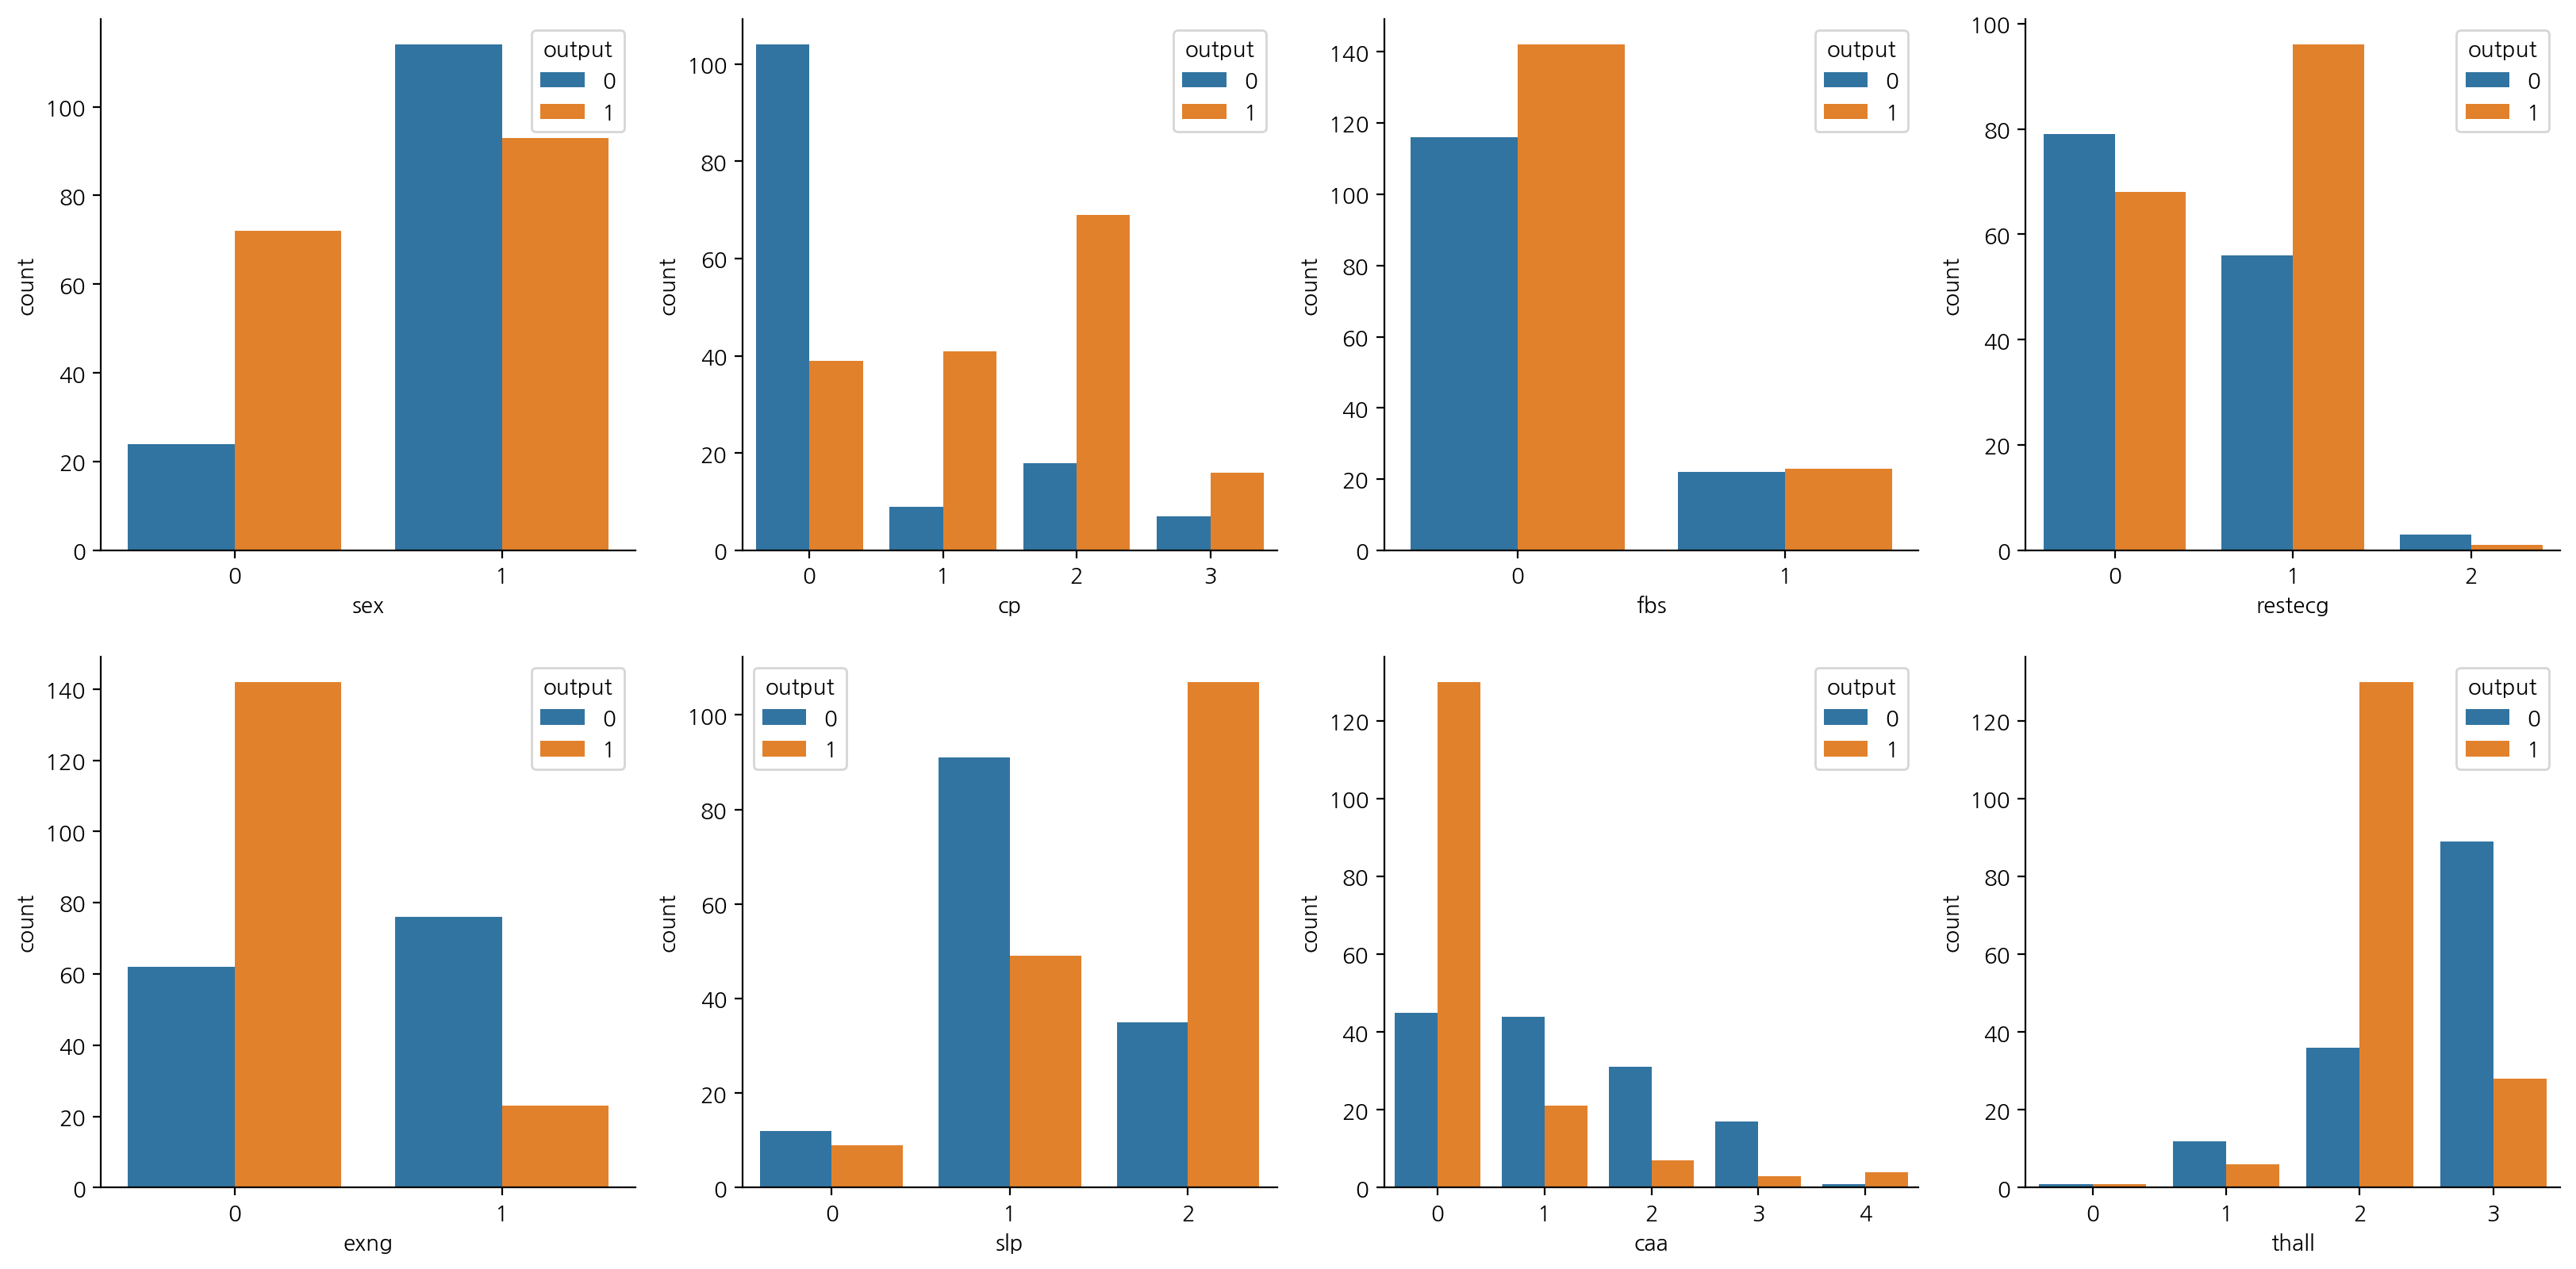

In [13]:
attrs = categorical_var

plt.figure(figsize=(20, 20), dpi = 200)

for i, feature in enumerate(attrs) :
  plt.subplot(4, 4, i+1)
  sns.countplot(df, x = feature, hue = 'output')

sns.despine()

### 수치형 변수 (numberic_var)와 output 관계 시각화

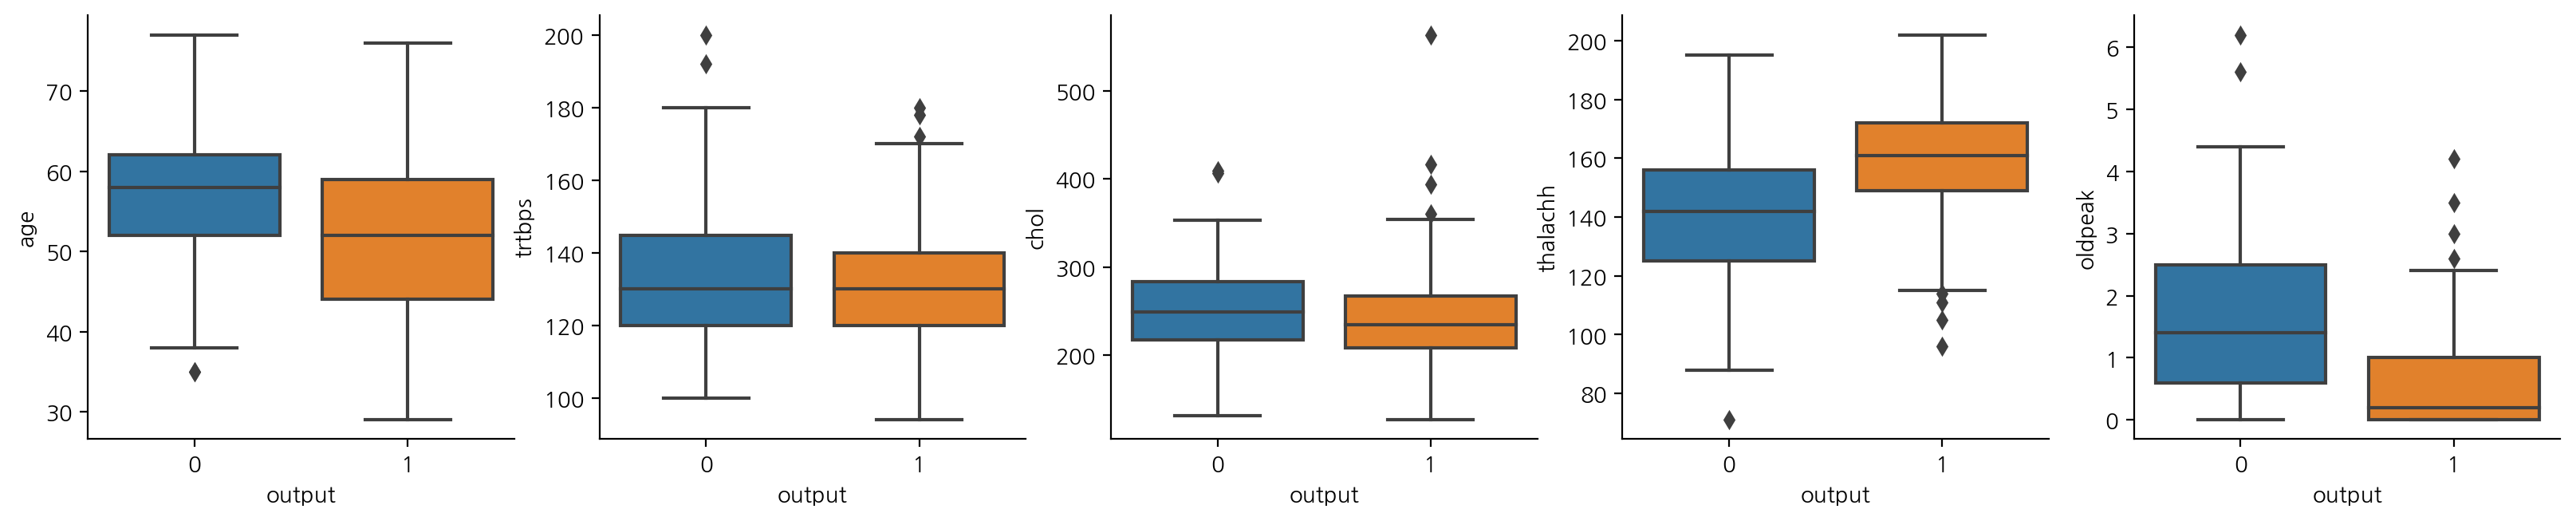

In [14]:
attrs = numberic_var

plt.figure(figsize=(20, 20), dpi = 200)

for i, feature in enumerate(attrs) :
  plt.subplot(5, 5, i+1)
  sns.boxplot(df, x = 'output', y = feature)

sns.despine()

#### 수치형 칼럼 중 나이 칼럼을 제외하고 상위, 하위 5% 이상치 제거

In [15]:
numberic_var

['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

In [16]:
# 상위 5% 삭제
df = df[df['trtbps'] < df['trtbps'].quantile(0.95)]
df = df[df['chol'] < df['chol'].quantile(0.95)]
df = df[df['oldpeak'] < df['oldpeak'].quantile(0.95)]

# 하위 5% 삭제
df = df[df['thalachh'] > df['thalachh'].quantile(0.05)]

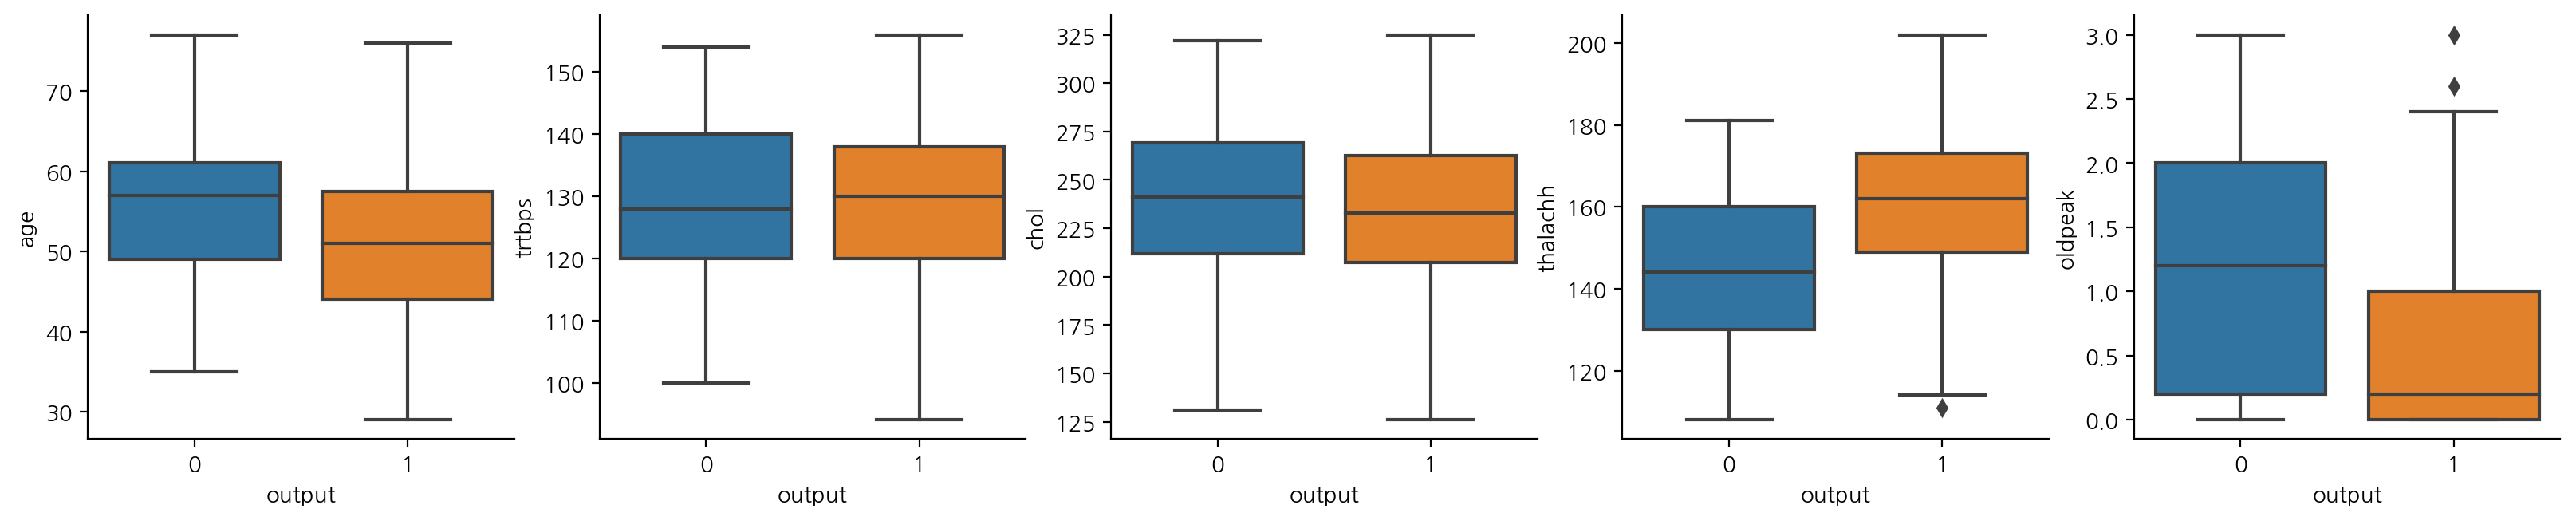

In [17]:
attrs = numberic_var

plt.figure(figsize=(20, 20), dpi = 200)

for i, feature in enumerate(attrs) :
  plt.subplot(5, 5, i+1)
  sns.boxplot(df, x = 'output', y = feature)

sns.despine()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       236 non-null    int64   
 1   sex       236 non-null    category
 2   cp        236 non-null    category
 3   trtbps    236 non-null    int64   
 4   chol      236 non-null    int64   
 5   fbs       236 non-null    category
 6   restecg   236 non-null    category
 7   thalachh  236 non-null    int64   
 8   exng      236 non-null    category
 9   oldpeak   236 non-null    float64 
 10  slp       236 non-null    category
 11  caa       236 non-null    category
 12  thall     236 non-null    category
 13  output    236 non-null    int64   
dtypes: category(8), float64(1), int64(5)
memory usage: 16.0 KB


## 데이터 분리하기

### feature.target 분리

In [19]:
X = df[df.columns[:-1]]
y = df[df.columns[-1]]

X

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [20]:
y

0      1
2      1
3      1
5      1
6      1
      ..
296    0
298    0
299    0
301    0
302    0
Name: output, Length: 236, dtype: int64

### 범주형 데이터 원핫인코딩

In [21]:
# 범주형 -> 원핫 인코딩
temp_x = pd.get_dummies(X[categorical_var])

# 원핫 인코딩 칼럼 추가
X_modified = pd.concat([X, temp_x], axis =1)

# 기존 칼럼 삭제
X_modified.drop(categorical_var, axis=1, inplace =True)
X_modified

,age,trtbps,chol,thalachh,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slp_2,caa_0,caa_1,caa_2,caa_3,caa_4,thall_0,thall_1,thall_2,thall_3
0,63,145,233,150,2.3,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,41,130,204,172,1.4,1,0,0,1,0,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,0,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
5,57,140,192,148,0.4,0,1,1,0,0,...,0,1,0,0,0,0,0,1,0,0
6,56,140,294,153,1.3,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,63,124,197,136,0.0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
298,57,140,241,123,0.2,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
299,45,110,264,132,1.2,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
301,57,130,131,115,1.2,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1


### 수치형 데이터 정규화(범위 축소)

In [22]:
X_modified[numberic_var] = StandardScaler().fit(X_modified[numberic_var]).transform(X_modified[numberic_var])

In [23]:
X_modified.head()

,age,trtbps,chol,thalachh,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slp_2,caa_0,caa_1,caa_2,caa_3,caa_4,thall_0,thall_1,thall_2,thall_3
0,1.088233,1.270395,-0.098127,-0.169712,1.748923,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,-1.303853,0.177516,-0.804308,0.926238,0.711873,1,0,0,1,0,...,1,1,0,0,0,0,0,0,1,0
3,0.327115,-0.551070,-0.025073,1.225134,0.020507,0,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
5,0.435846,0.906102,-1.096521,-0.269344,-0.440404,0,1,1,0,0,...,0,1,0,0,0,0,0,1,0,0
6,0.327115,0.906102,1.387290,-0.020264,0.596645,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0


## 전처리 데이터 저장

In [26]:
X_modified.to_csv('heart_features_20230801.csv', encoding='utf-8-sig', index=False)

In [27]:
y.to_csv('heart_target_20230801.csv', encoding='utf-8-sig', index=False)